# 三角板关键点检测

## 下载三角板关键点检测数据集

## 进入 mmpose 主目录 或 mmdetection 主目录

In [ ]:
import os
os.chdir('mmpose')

## 下载数据集至`data`目录

In [ ]:
# 删除原有的数据集文件（如有）
!rm -rf data/Triangle_215_Keypoint_coco data/Triangle_215_Keypoint_coco.zip

In [ ]:
# 下载数据集压缩包
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/Triangle_215_Keypoint_coco.zip -P data


## 解压数据集至`data`目录

In [ ]:
!unzip data/Triangle_215_Keypoint_coco.zip -d data >> /dev/null # 解压压缩包
!rm -rf data/Triangle_215_Keypoint_coco.zip # 删除压缩包

## 下载用于测试的图像和视频

In [ ]:
!mkdir data/test_triangle

In [ ]:
# 图像-30度直角三角板，拍摄：同济子豪兄、田文博
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_1.jpg -P data/test_triangle
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_2.jpg -P data/test_triangle
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_3.jpg -P data/test_triangle
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_4.jpg -P data/test_triangle

# 视频-30度直角三角板，拍摄：同济子豪兄，田文博
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_6.mp4 -P data/test_triangle
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_7.mp4 -P data/test_triangle
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_9.mp4 -P data/test_triangle

## 查看数据集中的图片

In [ ]:
# from PIL import Image
# Image.open('data/Triangle_215_Keypoint_coco/images/DSC_0373.jpg')

## 下载config配置文件至`data`目录

In [ ]:
# Faster R CNN 三角板目标检测
!rm -rf data/faster_r_cnn_triangle.py
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/faster_r_cnn_triangle.py -P data

In [ ]:
# RTMDet-Tiny 三角板目标检测
!rm -rf data/rtmdet_tiny_triangle.py
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/rtmdet_tiny_triangle.py -P data

# 进入 mmdetection 主目录
执行完成后重新执行以上cell

In [5]:
import os
os.chdir('../mmdetection')

# 训练

## 进入mmdetection主目录

## 目标检测算法：Faster R CNN

In [ ]:
# 建议在命令行中运行
!python tools/train.py data/faster_r_cnn_triangle.py

## 目标检测算法：RTMDet

In [ ]:
# 建议在命令行中运行
!python tools/train.py data/rtmdet_tiny_triangle.py

## 在`work_dirs`目录下，查看训练日志和训练得到的模型权重文件

# 可视化训练日志

## 测试集上评估模型精度

In [ ]:
!python tools/test.py data/rtmdet_tiny_triangle.py \
                      work_dirs/rtmdet_tiny_triangle/epoch_200.pth

## 导入工具包

In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [6]:
# 日志文件路径
log_path = 'work_dirs/faster_r_cnn_triangle/20230603_030246/vis_data/scalars.json'

In [7]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [8]:
len(json_list)

4310

In [9]:
eval(json_list[4])

{'lr': 0.00018016032064128258,
 'data_time': 0.10260882377624511,
 'loss': 1.1959105491638184,
 'loss_rpn_cls': 0.6975150465965271,
 'loss_rpn_bbox': 0.018466897867619993,
 'loss_cls': 0.47968568801879885,
 'acc': 99.0234375,
 'loss_bbox': 0.00024292324087582529,
 'time': 0.7586865425109863,
 'epoch': 1,
 'memory': 3407,
 'step': 5}

In [10]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 4310/4310 [00:02<00:00, 1587.29it/s]


In [11]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,memory,step
0,0.00002,0.488877,1.260158,0.701188,0.009449,0.549334,93.164062,0.000187,2.487881,1.0,3247.0,1.0
1,0.00006,0.248250,1.255958,0.700752,0.010476,0.544506,92.285156,0.000225,1.393595,1.0,3406.0,2.0
2,0.00010,0.167248,1.239502,0.699989,0.015686,0.523597,97.656250,0.000229,1.062683,1.0,3407.0,3.0
3,0.00014,0.126742,1.228862,0.698890,0.019864,0.509869,97.656250,0.000239,0.865786,1.0,3407.0,4.0
4,0.00018,0.102609,1.195911,0.697515,0.018467,0.479686,99.023438,0.000243,0.758687,1.0,3407.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0.00020,0.005011,0.066045,0.002980,0.006405,0.021222,99.218750,0.035438,0.316065,50.0,3406.0,4296.0
4296,0.00020,0.005012,0.066081,0.002937,0.006372,0.021263,99.414062,0.035509,0.315168,50.0,3407.0,4297.0
4297,0.00020,0.005011,0.065860,0.002739,0.006410,0.021240,98.632812,0.035471,0.315748,50.0,3407.0,4298.0
4298,0.00020,0.005002,0.066733,0.002830,0.006474,0.021855,97.851562,0.035574,0.314029,50.0,3407.0,4299.0


In [12]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,pascal_voc/mAP,pascal_voc/AP50,data_time,time,step
0,0.473,0.945,0.322,-1.0,-1.0,0.473,0.916510,0.917,0.105862,0.204280,5.0
1,0.816,0.980,0.968,-1.0,-1.0,0.816,0.997783,0.998,0.095467,0.193986,10.0
2,0.834,0.980,0.968,-1.0,-1.0,0.834,0.998878,0.999,0.086447,0.177662,15.0
3,0.848,0.980,0.968,-1.0,-1.0,0.848,0.998878,0.999,0.092137,0.196506,20.0
4,0.844,0.980,0.967,-1.0,-1.0,0.844,0.997783,0.998,0.092369,0.186694,25.0
5,0.850,0.980,0.956,-1.0,-1.0,0.850,0.998878,0.999,0.094811,0.191709,30.0
6,0.858,0.980,0.967,-1.0,-1.0,0.858,0.998878,0.999,0.094980,0.192636,35.0
7,0.855,0.980,0.966,-1.0,-1.0,0.855,0.998878,0.999,0.106929,0.201977,40.0
8,0.857,0.980,0.967,-1.0,-1.0,0.857,0.998878,0.999,0.090865,0.184214,45.0
9,0.860,0.980,0.966,-1.0,-1.0,0.860,0.998878,0.999,0.087055,0.179287,50.0


## 导出训练日志表格

In [13]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [ ]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [ ]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /usr/local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /root/.cache/matplotlib

In [14]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

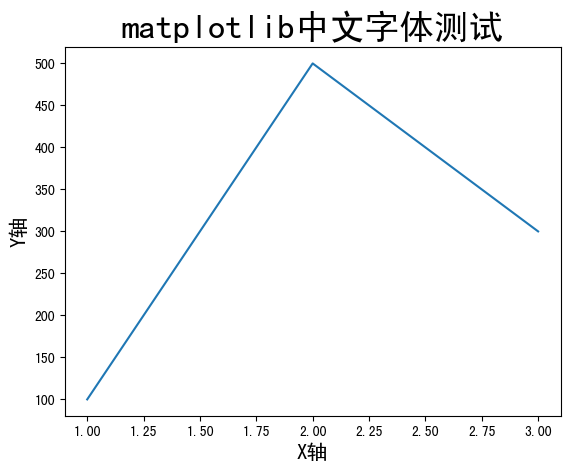

In [15]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [17]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls',
       'acc', 'loss_bbox', 'time', 'epoch', 'memory', 'step'],
      dtype='object')

In [18]:
metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']

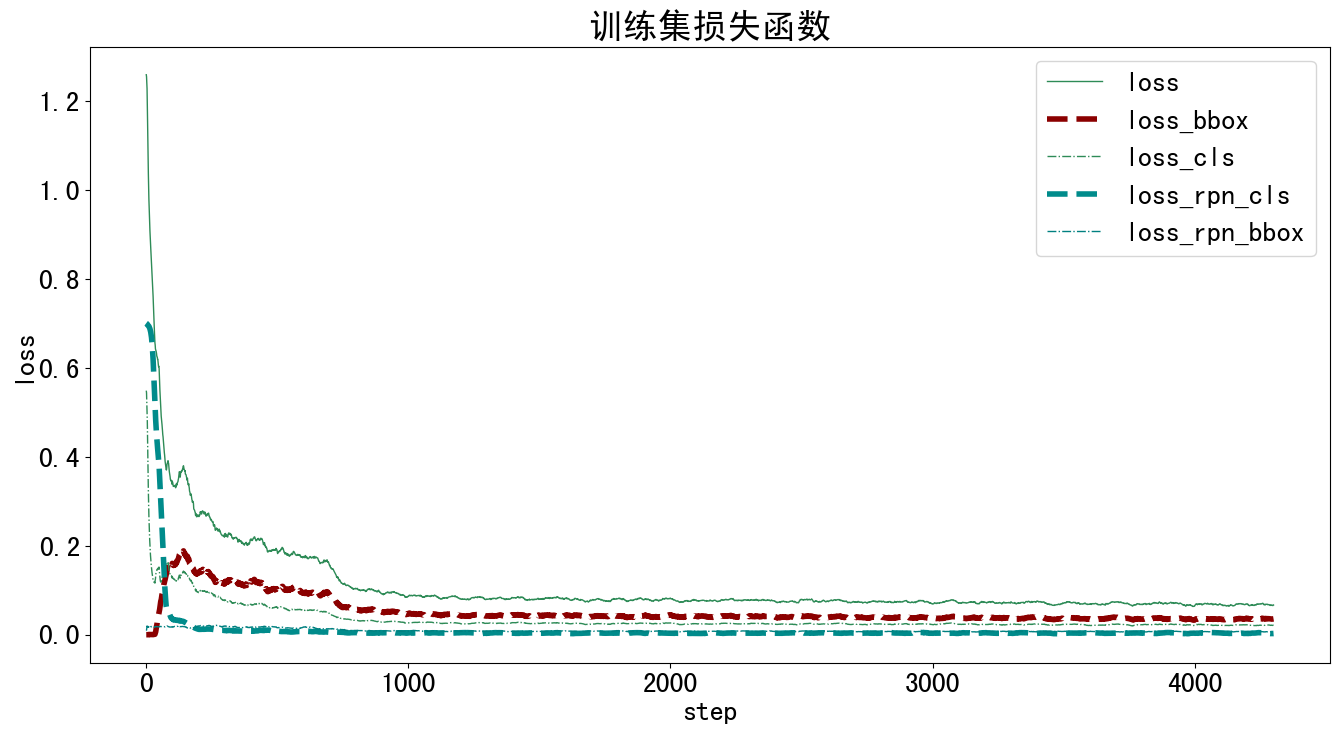

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [20]:
metrics = ['acc']

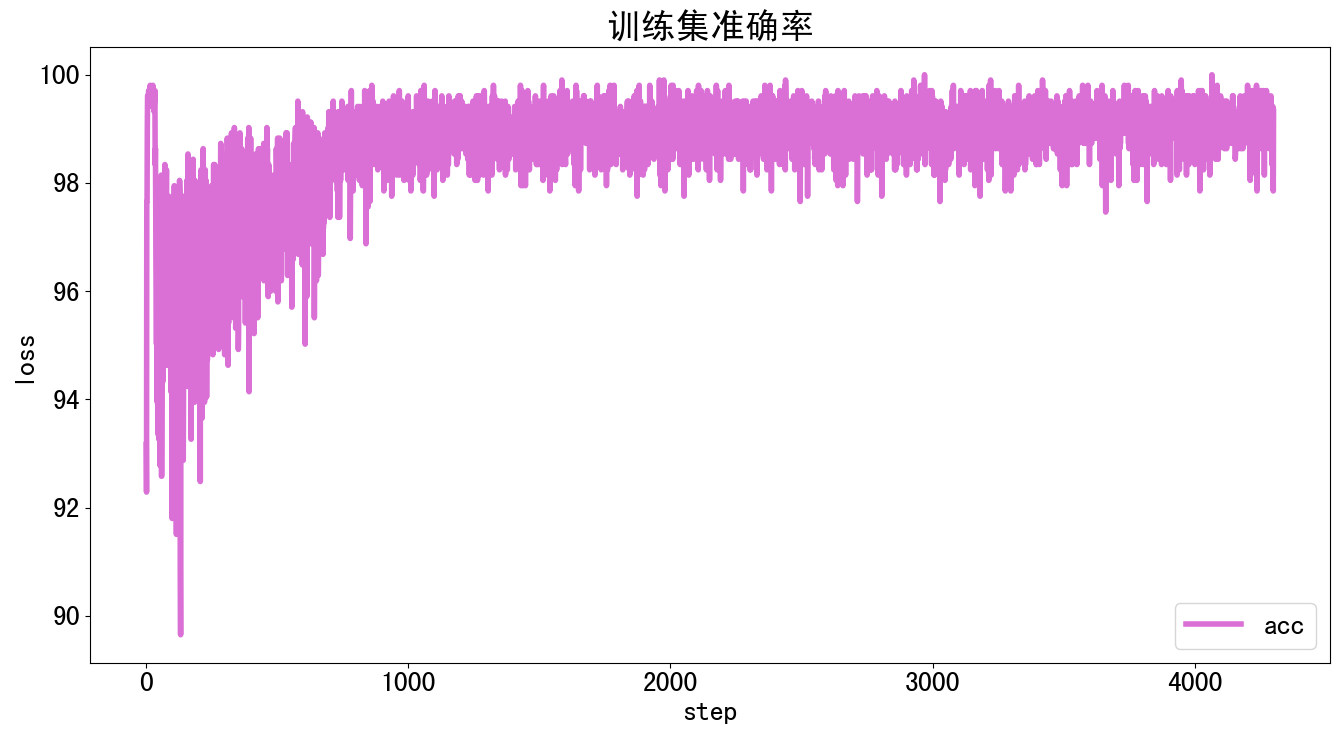

In [21]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [22]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l',
       'pascal_voc/mAP', 'pascal_voc/AP50', 'data_time', 'time', 'step'],
      dtype='object')

In [23]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

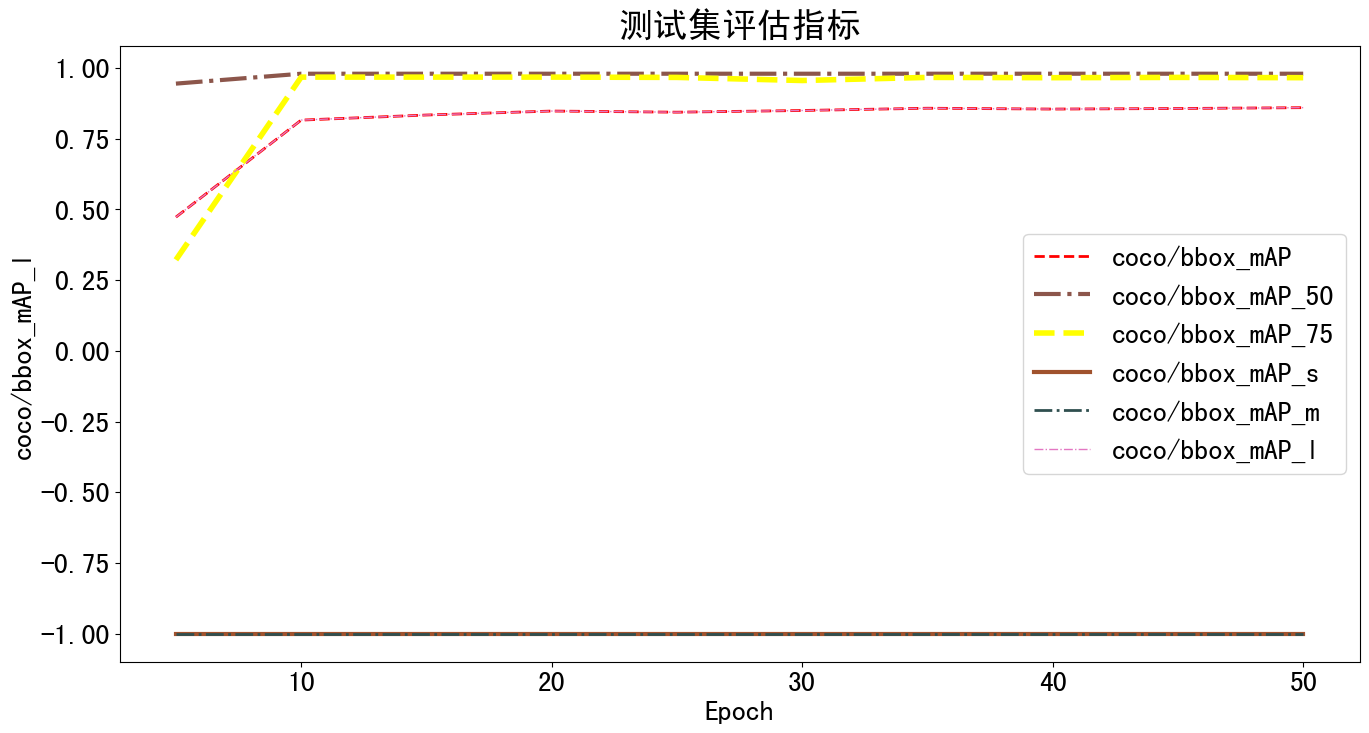

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric

In [25]:
metrics = ['pascal_voc/mAP', 'pascal_voc/AP50']

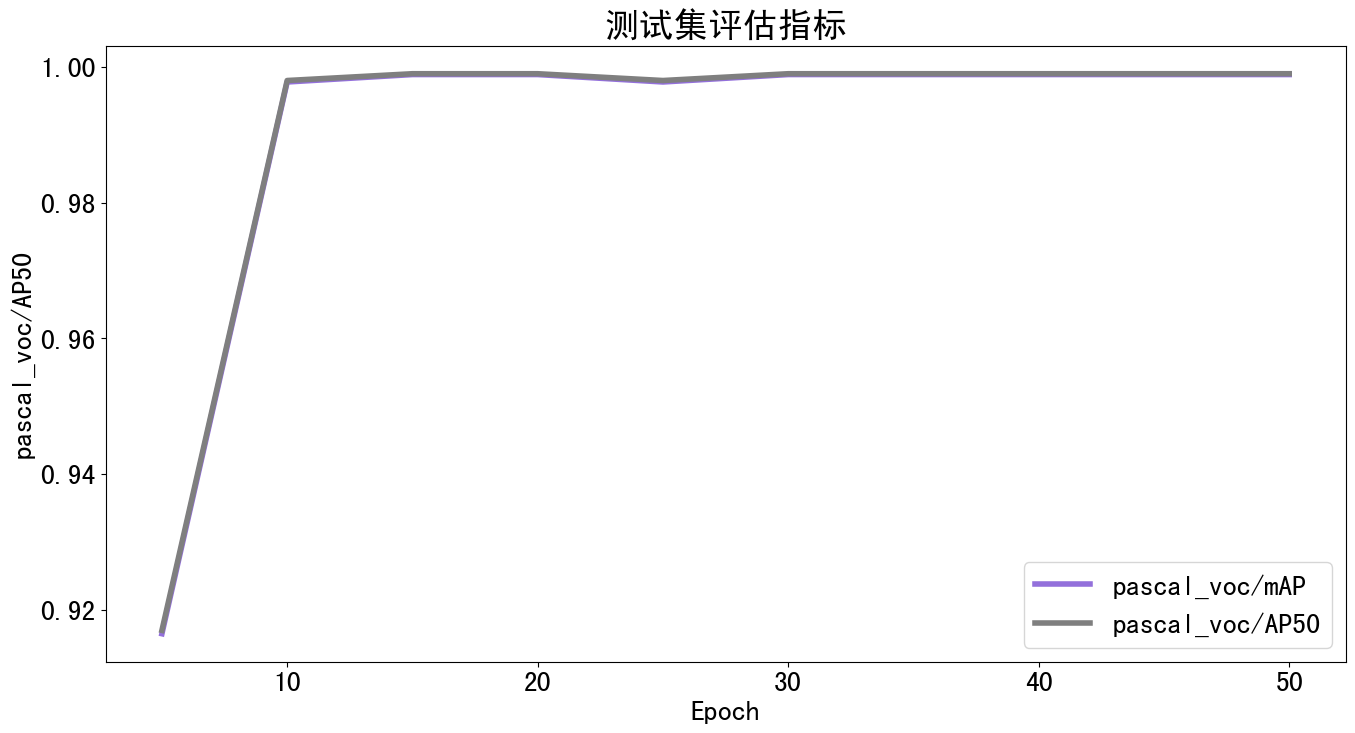

In [26]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 模型权重文件精简转换

## 模型轻量化转换

In [ ]:
# Faster R CNN
!python tools/model_converters/publish_model.py \
        work_dirs/faster_r_cnn_triangle/epoch_50.pth \
        checkpoint/faster_r_cnn_triangle_epoch_50_202305120846.pth

In [ ]:
# RTMDet-tiny
!python tools/model_converters/publish_model.py \
        work_dirs/rtmdet_tiny_triangle/epoch_200.pth \
        checkpoint/rtmdet_tiny_triangle_epoch_200_202305120847.pth

## 模型权重文件保存在`checkpoint`目录

# 下载训练好的模型权重

## 进入 mmpose 主目录 或 mmdetection 主目录

In [ ]:
import os
os.chdir('../mmpose')
# os.chdir('mmdetection')

## 下载模型权重文件至`checkpoint`目录

In [ ]:
# Faster R CNN 三角板目标检测
!rm -rf checkpoint/faster_r_cnn_triangle_epoch_50_202305120846-76d9dde3.pth
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/triangle_dataset/ckpt/0512/faster_r_cnn_triangle_epoch_50_202305120846-76d9dde3.pth -P checkpoint


In [ ]:
# RTMDet-Tiny 三角板目标检测
!rm -rf checkpoint/rtmdet_tiny_triangle_epoch_200_202305120847-3cd02a8f.pth
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220610-mmpose/triangle_dataset/ckpt/0512/rtmdet_tiny_triangle_epoch_200_202305120847-3cd02a8f.pth -P checkpoint


In [ ]:
import os
os.chdir('../mmdetection')

## 目标检测预测-单张图像

In [ ]:
# Faster R CNN
!python demo/image_demo.py \
        data/test_triangle/triangle_3.jpg \
        data/faster_r_cnn_triangle.py \
        --weights checkpoint/faster_r_cnn_triangle_epoch_50_202305120846-76d9dde3.pth \
        --out-dir outputs/E2_faster_r_cnn \
        --device cuda:0 \
        --pred-score-thr 0.3

In [ ]:
# RTMDet
!python demo/image_demo.py \
        data/test_triangle/triangle_3.jpg \
        data/rtmdet_tiny_triangle.py \
        --weights checkpoint/rtmdet_tiny_triangle_epoch_200_202305120847-3cd02a8f.pth \
        --out-dir outputs/E2_rtmdet \
        --device cuda:0 \
        --pred-score-thr 0.3

## 目标检测预测-视频

In [ ]:
# Faster R CNN
!python demo/video_demo.py \
        data/test_triangle/triangle_9.mp4 \
        data/faster_r_cnn_triangle.py \
        checkpoint/faster_r_cnn_triangle_epoch_50_202305120846-2efbf3f0.pth \
        --device cuda:0 \
        --score-thr 0.96 \
        --out outputs/E2_out_video_faster_r_cnn.mp4

In [ ]:
# RTMDet
!python demo/video_demo.py \
        data/test_triangle/triangle_9.mp4 \
        data/rtmdet_tiny_triangle.py \
        checkpoint/rtmdet_tiny_triangle_epoch_200_202305120847-96eca315.pth \
        --device cuda:0 \
        --score-thr 0.6 \
        --out outputs/E2_out_video_rtmdet.mp4

## 目标检测预测-摄像头实时画面

见本地运行的代码教程，需在本地调用摄像头运行，不能在云GPU平台运行